<h1 style="color:Green;"> Loading Dataset</h1>

In [5]:
import pandas as pd
df=pd.read_csv('complete_gold_price_dataset.csv')
df.head()

,date,open_price,high_price,low_price,close_price
0,NaN,GC=F,GC=F,GC=F,GC=F
1,2004-10-01,419.1000061035156,430.0,410.29998779296875,428.5
2,2004-11-01,427.29998779296875,454.79998779296875,424.6000061035156,451.29998779296875
3,2004-12-01,451.6000061035156,456.5,432.6000061035156,437.5
4,2005-01-01,431.0,431.0,418.70001220703125,421.79998779296875


In [12]:
df = df[df['date'].notnull()] 
df.head()

,date,open_price,high_price,low_price,close_price
1,2004-10-01,419.1000061035156,430.0,410.29998779296875,428.5
2,2004-11-01,427.29998779296875,454.79998779296875,424.6000061035156,451.29998779296875
3,2004-12-01,451.6000061035156,456.5,432.6000061035156,437.5
4,2005-01-01,431.0,431.0,418.70001220703125,421.79998779296875
5,2005-02-01,422.20001220703125,436.0,410.1000061035156,436.5


<h1 style="color:Orange;">Model Building</h1>

In [14]:
#pip install pandas numpy scikit-learn matplotlib


<h2 style="color:red">Dependencies</h2>

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [18]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

In [17]:
df.head()

,date,open_price,high_price,low_price,close_price
1,2004-10-01,419.1000061035156,430.0,410.29998779296875,428.5
2,2004-11-01,427.29998779296875,454.79998779296875,424.6000061035156,451.29998779296875
3,2004-12-01,451.6000061035156,456.5,432.6000061035156,437.5
4,2005-01-01,431.0,431.0,418.70001220703125,421.79998779296875
5,2005-02-01,422.20001220703125,436.0,410.1000061035156,436.5


### predicting next month's price

In [19]:
df['next_close_price'] = df['close_price'].shift(-1)

In [21]:
df.head()

,date,open_price,high_price,low_price,close_price,next_close_price
1,2004-10-01,419.1000061035156,430.0,410.29998779296875,428.5,451.29998779296875
2,2004-11-01,427.29998779296875,454.79998779296875,424.6000061035156,451.29998779296875,437.5
3,2004-12-01,451.6000061035156,456.5,432.6000061035156,437.5,421.79998779296875
4,2005-01-01,431.0,431.0,418.70001220703125,421.79998779296875,436.5
5,2005-02-01,422.20001220703125,436.0,410.1000061035156,436.5,428.70001220703125


In [22]:
df.tail()

,date,open_price,high_price,low_price,close_price,next_close_price
206,2024-08-01,2446.699951171875,2527.300048828125,2367.39990234375,2493.800048828125,2738.300048828125
207,2024-10-01,2631.39990234375,2789.0,2602.5,2738.300048828125,2657.0
208,2024-11-01,2745.5,2756.0,2554.199951171875,2657.0,2812.5
209,2025-01-01,2633.0,2838.0,2617.300048828125,2812.5,2886.10009765625
210,2025-02-01,2818.199951171875,2910.60009765625,2780.89990234375,2886.10009765625,None


In [23]:
df = df[:-1]

In [24]:
X = df[['close_price']]  
y = df['next_close_price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 90.67238364213318


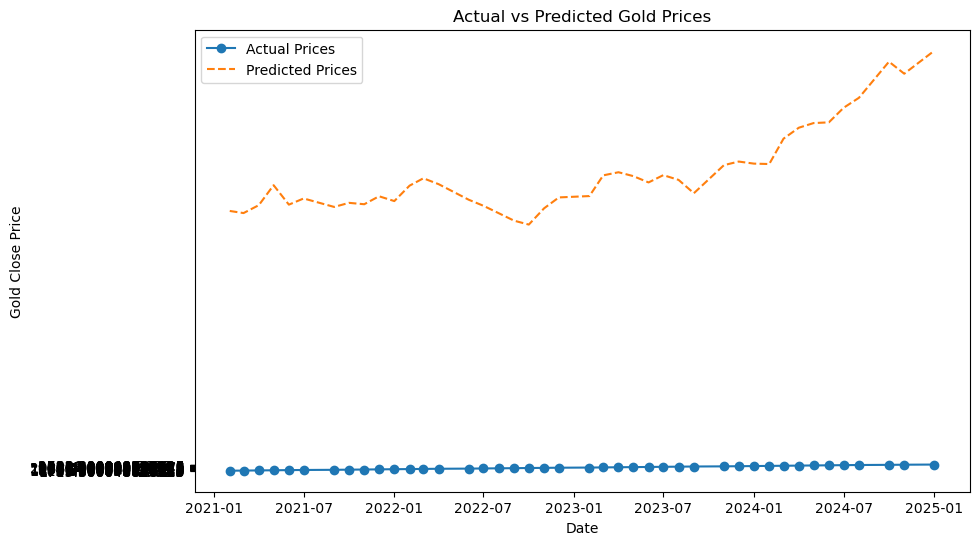

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'].iloc[-len(y_test):], y_test, label='Actual Prices', marker='o')
plt.plot(df['date'].iloc[-len(y_test):], y_pred, label='Predicted Prices', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gold Close Price')
plt.title('Actual vs Predicted Gold Prices')
plt.legend()
plt.show()
